In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

# Visualizations

In [39]:
import os
import pandas as pd

from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.custom_classes.experiments_visualizer import ExperimentsVisualizer

## Initialize Configs

In [4]:
EXPERIMENT_NAME = 'stress_testing_nulls'
DB_COLLECTION_NAME = f'{EXPERIMENT_NAME}_results'
DATASET_NAME = 'Folktables_GA_2018'
EXPERIMENT_SESSION_UUID = 'c53d250b-5ba9-4d91-a444-ed7eb7919de5'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'AGEP', 'SEX&RAC1P&AGEP']

In [5]:
MODEL_NAMES = ['DecisionTreeClassifier', 'LogisticRegression', 'RandomForestClassifier',
               'XGBClassifier', 'KNeighborsClassifier', 'MLPClassifier']

In [115]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [116]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [117]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(448, 27)

In [105]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].head(20)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,Injector_Config_Lst,AGEP_dis,AGEP_priv,RAC1P_dis,RAC1P_priv,SEX&RAC1P&AGEP_dis,SEX&RAC1P&AGEP_priv,SEX_dis,SEX_priv,overall
0,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-22 14:09:26.705,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.770941,0.819535,0.771368,0.782867,0.737063,0.905405,0.746923,0.813958,0.7791
1,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,1,OK,2023-04-22 14:09:26.716,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.768537,0.815962,0.768010,0.780637,0.735664,0.899614,0.745962,0.809583,0.7765
2,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,2,OK,2023-04-22 14:09:26.728,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.767456,0.813580,0.766484,0.779447,0.734965,0.893822,0.746154,0.806667,0.7752
3,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,3,OK,2023-04-22 14:09:26.745,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.762889,0.805241,0.761600,0.774093,0.734266,0.886100,0.743269,0.798958,0.7700
4,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,4,OK,2023-04-22 14:09:26.758,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.757481,0.794521,0.757021,0.766954,0.730769,0.874517,0.738654,0.790833,0.7637
5,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,5,OK,2023-04-22 14:09:26.769,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.752073,0.787373,0.749695,0.762046,0.724476,0.862934,0.734423,0.783542,0.7580
6,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,6,OK,2023-04-22 14:09:26.782,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.747987,0.777844,0.741758,0.758477,0.720979,0.861004,0.730385,0.777500,0.7530
14,Accuracy,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-22 14:12:05.983,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.735128,0.799285,0.739316,0.749108,0.730769,0.880309,0.744615,0.747292,0.7459
15,Accuracy,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,1,OK,2023-04-22 14:12:05.993,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.733806,0.798690,0.737179,0.748364,0.730769,0.882239,0.742885,0.746667,0.7447
16,Accuracy,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,2,OK,2023-04-22 14:12:06.004,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.732604,0.796903,0.733822,0.748067,0.726573,0.880309,0.741154,0.745833,0.7434


In [106]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct()

In [109]:
exp_subgroup_metrics_dct['DecisionTreeClassifier']['Exp_iter_1'][0.0].head(100)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,Injector_Config_Lst,AGEP_dis,AGEP_priv,RAC1P_dis,RAC1P_priv,SEX&RAC1P&AGEP_dis,SEX&RAC1P&AGEP_priv,SEX_dis,SEX_priv,overall
0,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-22 14:09:26.705,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.770941,0.819535,0.771368,0.782867,0.737063,0.905405,0.746923,0.813958,0.779100
14,Accuracy,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-22 14:12:05.983,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.735128,0.799285,0.739316,0.749108,0.730769,0.880309,0.744615,0.747292,0.745900
56,Entropy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-22 14:09:26.705,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.136117,0.000000,0.000000,0.119009,0.000000,0.000000,0.087815,0.000000,0.123117
70,Entropy,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-22 14:12:05.983,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.000000,0.000000,0.164167,0.000000,0.000000,0.000000,0.000000,0.178092,0.000000
112,F1,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-22 14:09:26.705,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.791785,0.890889,0.809463,0.817500,0.763819,0.945495,0.782982,0.847793,0.814852
126,F1,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-22 14:12:05.983,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.764127,0.877588,0.779100,0.795043,0.744526,0.930804,0.773456,0.805453,0.789948
168,FNR,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-22 14:09:26.705,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.161693,0.046261,0.121480,0.141507,0.155556,0.038462,0.133577,0.136458,0.135053
182,FNR,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-22 14:12:05.983,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.174185,0.068620,0.168415,0.140982,0.220833,0.056561,0.172628,0.128125,0.149822
224,FPR,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-22 14:09:26.705,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.301901,0.636126,0.361092,0.315952,0.371831,0.421053,0.386179,0.260417,0.331050
238,FPR,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-22 14:12:05.983,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.362931,0.649215,0.374744,0.394511,0.318310,0.486842,0.347561,0.439583,0.387900


In [110]:
exp_subgroup_metrics_dct['DecisionTreeClassifier']['Exp_iter_2'][0.0].head(100)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,Injector_Config_Lst,AGEP_dis,AGEP_priv,RAC1P_dis,RAC1P_priv,SEX&RAC1P&AGEP_dis,SEX&RAC1P&AGEP_priv,SEX_dis,SEX_priv,overall
28,Accuracy,201,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-22 22:10:59.314,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.726826,0.759394,0.728188,0.734157,0.705924,0.848671,0.711046,0.754350,0.732200
42,Accuracy,202,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-22 22:13:09.754,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.743114,0.752727,0.726968,0.753347,0.731620,0.848671,0.725513,0.764790,0.744700
84,Entropy,201,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-22 22:10:59.314,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.095177,0.000000,0.000000,0.059334,0.139974,0.000000,0.080515,0.000000,0.000000
98,Entropy,202,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-22 22:13:09.754,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
140,F1,201,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-22 22:10:59.314,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.757830,0.848877,0.774943,0.779028,0.751508,0.909314,0.757387,0.798455,0.777686
154,F1,202,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-22 22:13:09.754,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.771638,0.847647,0.776529,0.794446,0.763819,0.911695,0.762838,0.813201,0.788501
196,FNR,201,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-22 22:10:59.314,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.183482,0.079273,0.140616,0.170398,0.121298,0.095122,0.122146,0.195328,0.160874
210,FNR,202,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-22 22:13:09.754,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.170899,0.062758,0.128852,0.156176,0.142454,0.068293,0.140791,0.153351,0.147438
252,FPR,201,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-22 22:10:59.314,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.371701,0.685649,0.428667,0.389744,0.471098,0.443038,0.465219,0.322631,0.402897
266,FPR,202,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-22 22:13:09.754,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.351345,0.756264,0.445412,0.364103,0.397399,0.582278,0.415762,0.360435,0.391580


In [44]:
exp_avg_group_metrics_dct = exp_composer.compose_group_metrics(exp_subgroup_metrics_dct)

In [45]:
exp_avg_group_metrics_dct['DecisionTreeClassifier']['Exp_iter_1'][0.5].head(100)

,Metric,SEX,RAC1P,AGEP,SEX&RAC1P&AGEP,Model_Name
0,Equalized_Odds_TPR,-0.049384,-0.023622,-0.105608,-0.191726,DecisionTreeClassifier
1,Equalized_Odds_FPR,0.005043,0.005170,-0.276075,-0.118940,DecisionTreeClassifier
2,Disparate_Impact,1.028784,0.994920,1.002776,1.034140,DecisionTreeClassifier
3,Statistical_Parity_Difference,0.029663,-0.005318,0.002895,0.033792,DecisionTreeClassifier
4,Accuracy_Parity,-0.038494,-0.017047,-0.036052,-0.155873,DecisionTreeClassifier
5,Label_Stability_Ratio,1.068731,0.982722,0.935809,0.960990,DecisionTreeClassifier
6,IQR_Parity,-0.043025,0.001928,0.001826,-0.036516,DecisionTreeClassifier
7,Std_Parity,-0.027653,0.003487,0.005419,-0.013523,DecisionTreeClassifier
8,Std_Ratio,0.762326,1.034582,1.055606,0.868510,DecisionTreeClassifier
9,Jitter_Parity,-0.038243,0.008970,0.043678,0.028686,DecisionTreeClassifier


In [46]:
exp_avg_group_metrics_dct['DecisionTreeClassifier']['Exp_iter_1'][0.3].head(100)

,Metric,SEX,RAC1P,AGEP,SEX&RAC1P&AGEP,Model_Name
0,Equalized_Odds_TPR,-0.033765,-0.010951,-0.108343,-0.163276,DecisionTreeClassifier
1,Equalized_Odds_FPR,0.010855,0.007839,-0.282018,-0.102039,DecisionTreeClassifier
2,Disparate_Impact,1.049886,1.009298,1.005764,1.078998,DecisionTreeClassifier
3,Statistical_Parity_Difference,0.052727,0.010036,0.006213,0.078909,DecisionTreeClassifier
4,Accuracy_Parity,-0.035176,-0.011721,-0.046761,-0.153105,DecisionTreeClassifier
5,Label_Stability_Ratio,1.068500,0.988394,0.924832,0.959175,DecisionTreeClassifier
6,IQR_Parity,-0.039710,0.001162,0.004776,-0.031439,DecisionTreeClassifier
7,Std_Parity,-0.027532,0.002593,0.008413,-0.012046,DecisionTreeClassifier
8,Std_Ratio,0.756403,1.026503,1.091746,0.877404,DecisionTreeClassifier
9,Jitter_Parity,-0.039716,0.005379,0.052325,0.029466,DecisionTreeClassifier


## Metrics Visualization and Reporting

In [112]:
visualizer = ExperimentsVisualizer(exp_subgroup_metrics_dct=exp_subgroup_metrics_dct,
                                   exp_avg_runs_group_metrics_dct=exp_avg_group_metrics_dct,
                                   dataset_name=DATASET_NAME,
                                   model_names=MODEL_NAMES,
                                   sensitive_attrs=SENSITIVE_ATTRS)

### Subgroup metrics per dataset, experiment iteration, and model

In [93]:
visualizer.create_subgroups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                                exp_iter='Exp_iter_1',
                                                subgroup_metrics_type='variance')

alt.VConcatChart(...)

In [94]:
visualizer.create_subgroups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                                exp_iter='Exp_iter_1',
                                                subgroup_metrics_type='error')

alt.VConcatChart(...)

### Group metrics per dataset, experiment iteration, and model

In [95]:
visualizer.create_groups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                             exp_iter='Exp_iter_1',
                                             group_metrics_type='variance')

alt.VConcatChart(...)

In [96]:
visualizer.create_groups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                             exp_iter='Exp_iter_1',
                                             group_metrics_type='fairness')

alt.VConcatChart(...)

### Specific subgroup metric per dataset, experiment iteration, and multiple models

In [97]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='Jitter',
                                                          model_names=MODEL_NAMES[:2],
                                                          exp_iter='Exp_iter_1')

alt.VConcatChart(...)

In [100]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='F1',
                                                          model_names=MODEL_NAMES[:2],
                                                          exp_iter='Exp_iter_1')

alt.VConcatChart(...)

### Specific group metric per dataset, experiment iteration, and multiple models

In [101]:
visualizer.create_groups_grid_pct_lines_per_model_plot(group_metric='Label_Stability_Ratio',
                                                       model_names=MODEL_NAMES[:2],
                                                       exp_iter='Exp_iter_1')

alt.VConcatChart(...)

In [102]:
visualizer.create_groups_grid_pct_lines_per_model_plot(group_metric='Disparate_Impact',
                                                       model_names=MODEL_NAMES[:2],
                                                       exp_iter='Exp_iter_1')

alt.VConcatChart(...)

### Box plots for subgroup metrics per model and experiment iteration

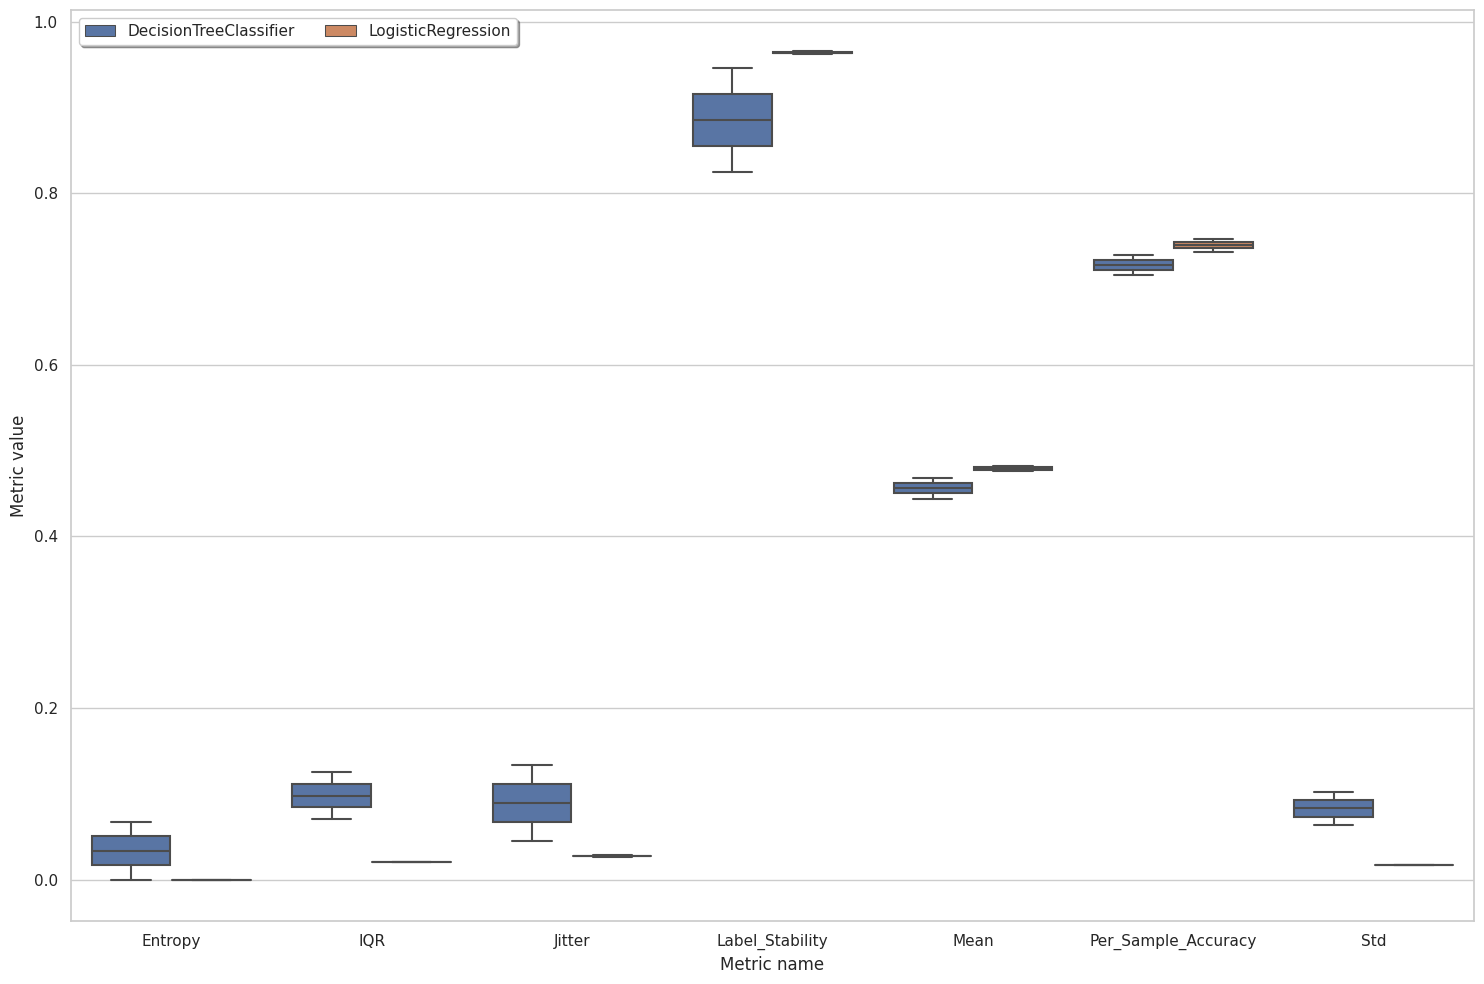

In [119]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_exp_iters(target_percentage=0.5,
                                                                   subgroup_metrics_type='variance')

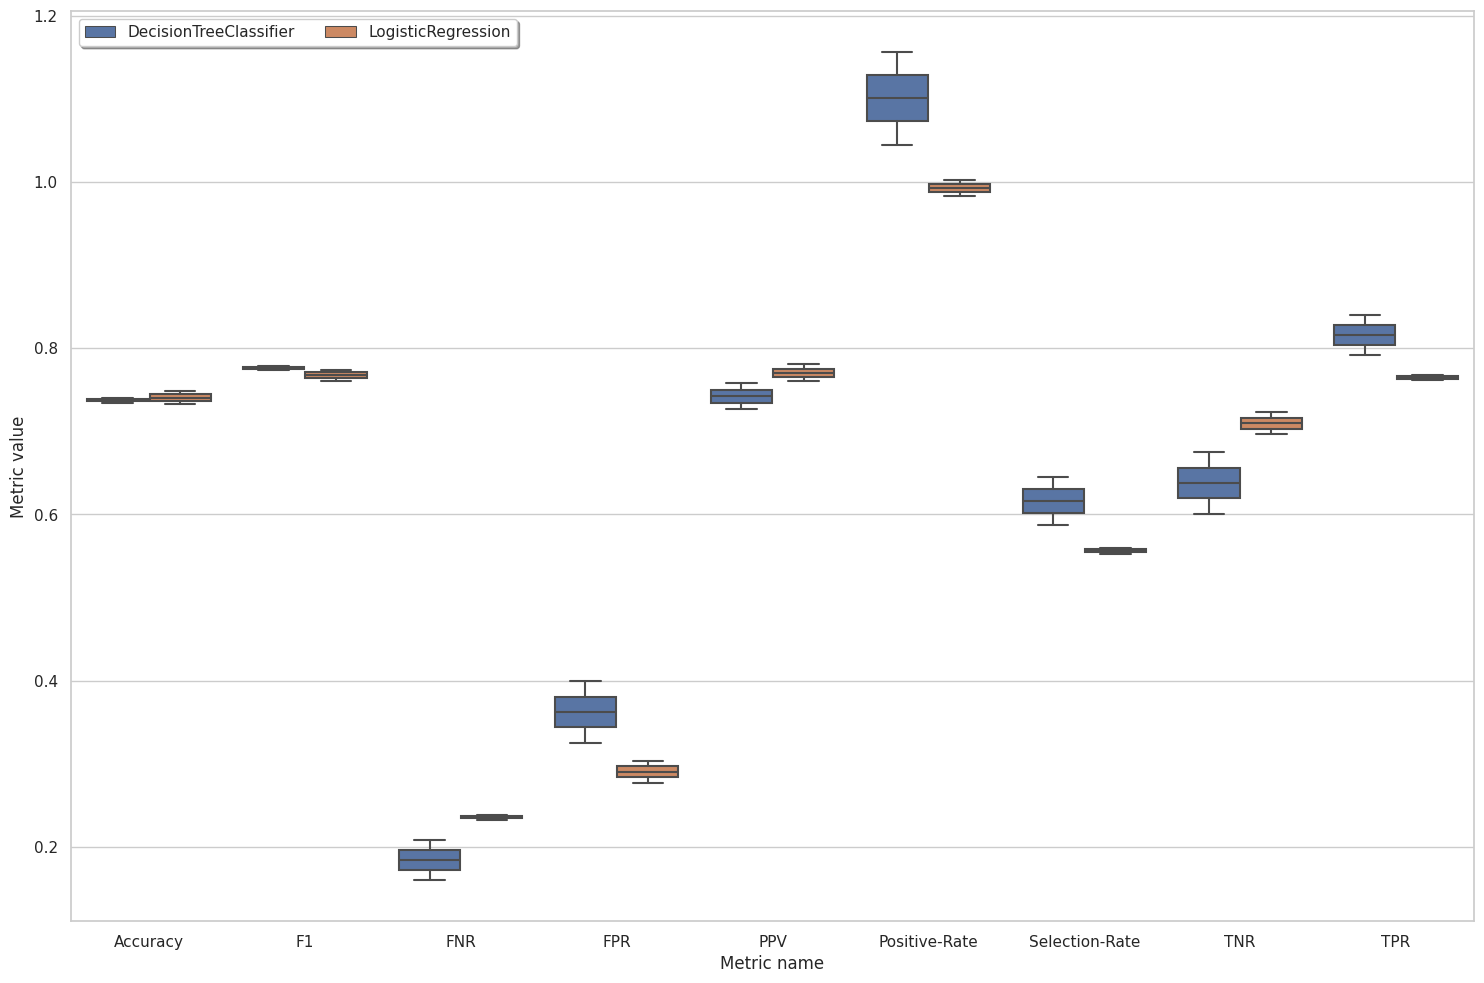

In [123]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_exp_iters(target_percentage=0.5,
                                                                   subgroup_metrics_type='error')

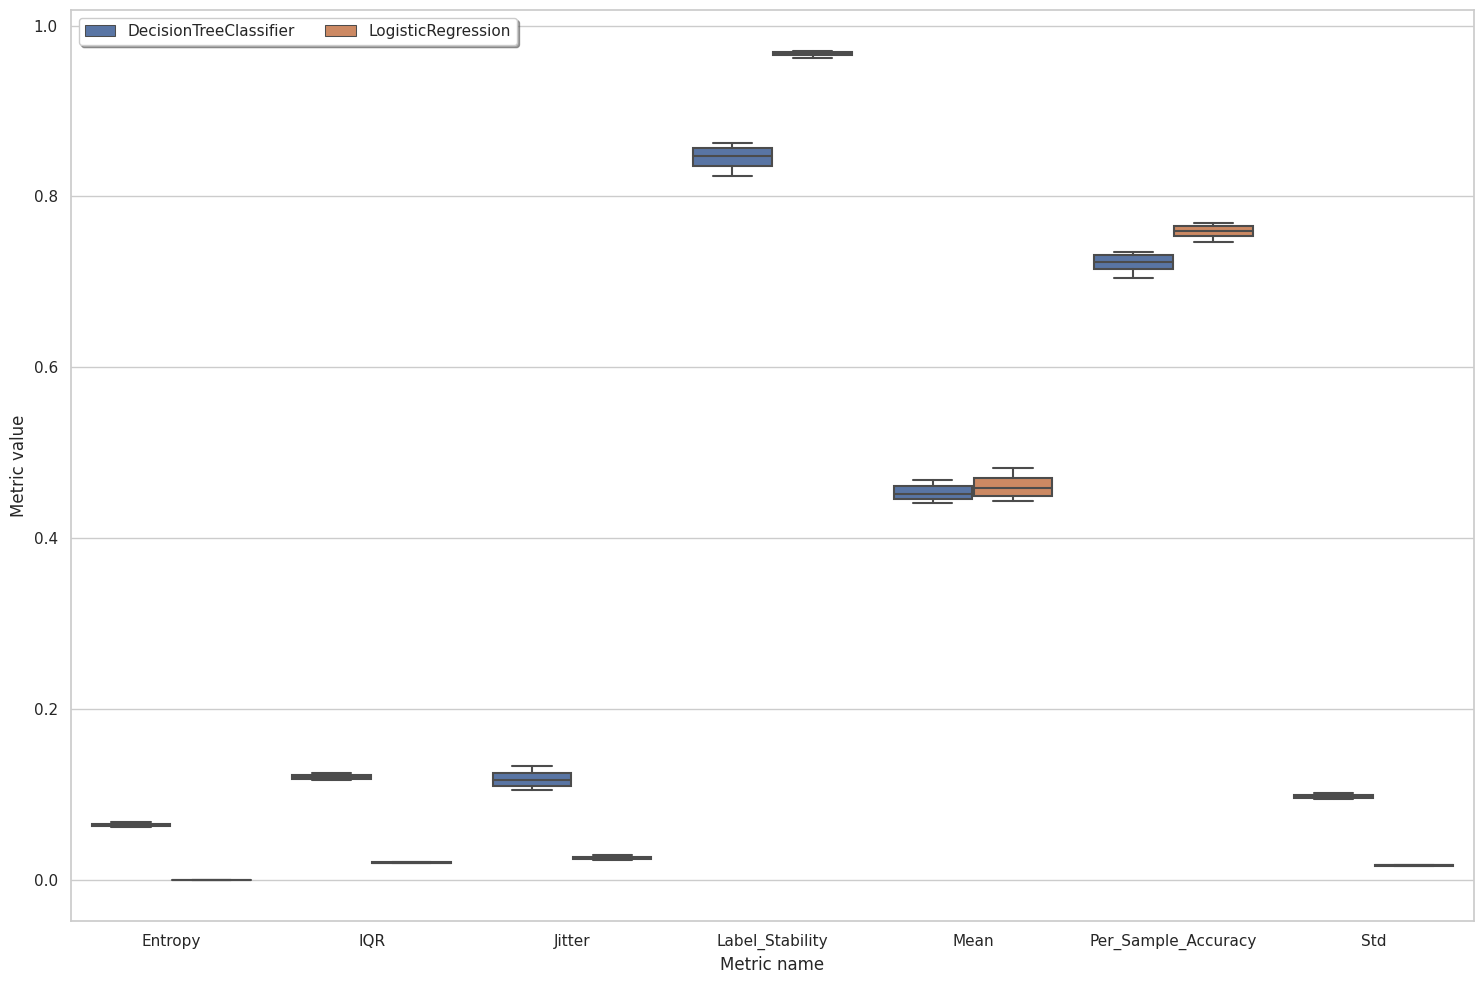

In [122]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_exp_iter='Exp_iter_1',
                                                                     subgroup_metrics_type='variance')

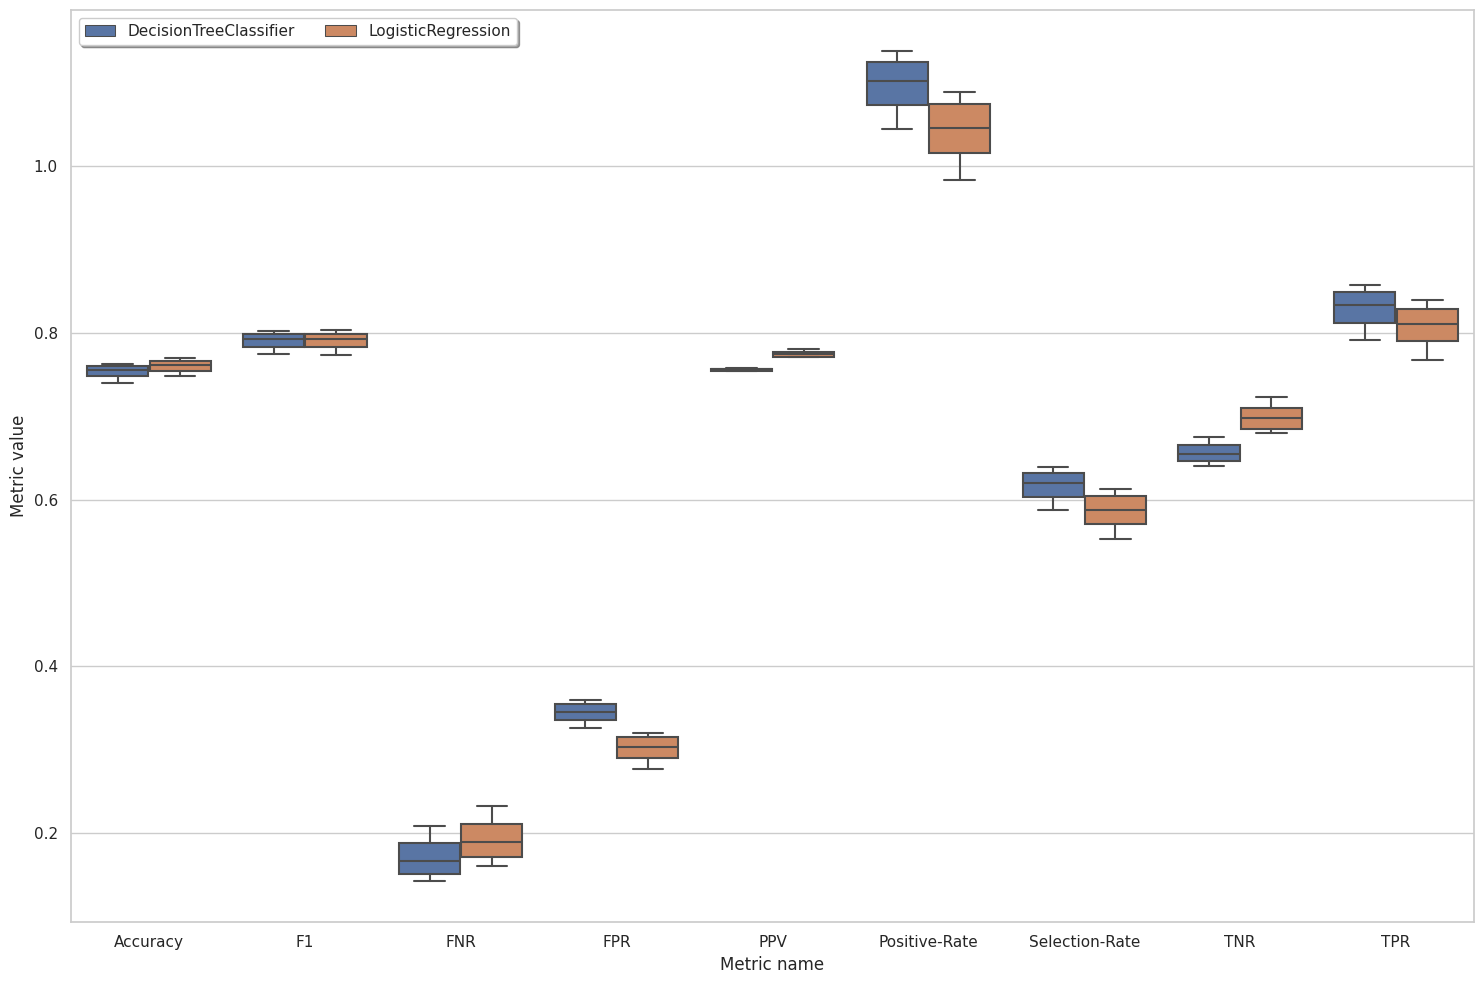

In [124]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_exp_iter='Exp_iter_1',
                                                                     subgroup_metrics_type='error')